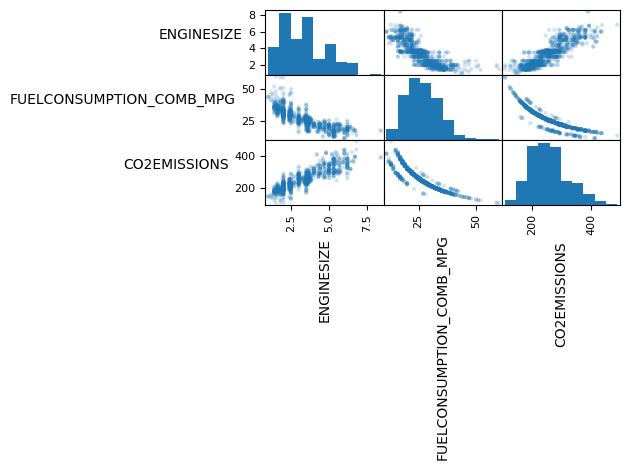

Coefficients: [[ 25.27339614 -37.4381472 ]]
Intercept: [256.29072488]
Original Coefficients: [[17.8581369  -5.01502179]]
Original Intercept: [329.1363967]


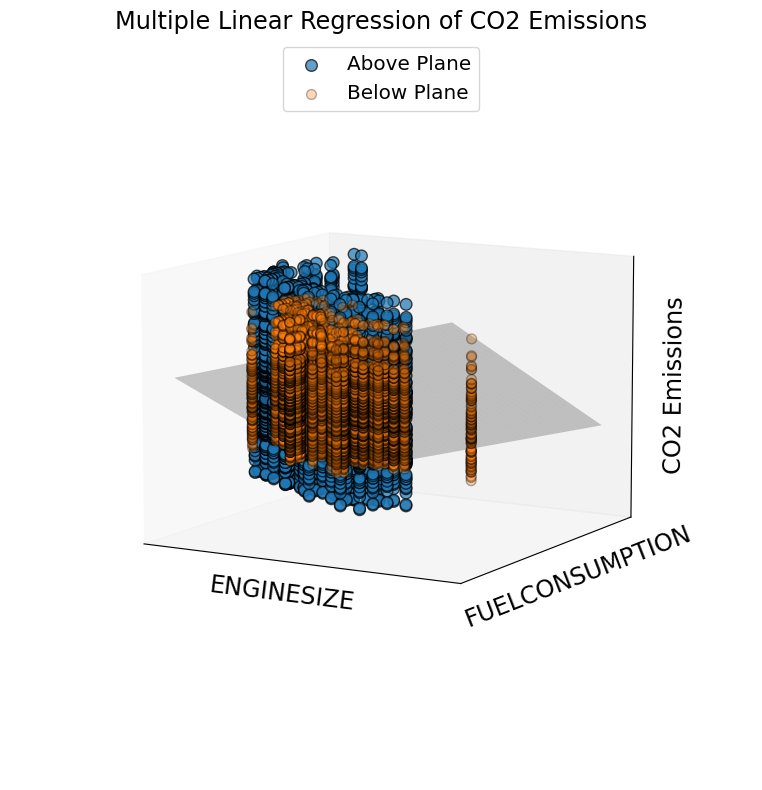

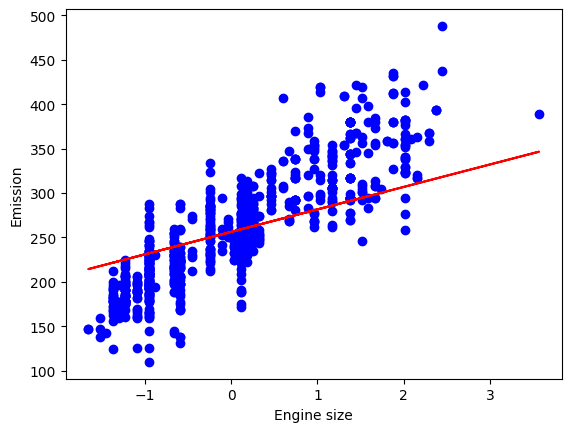

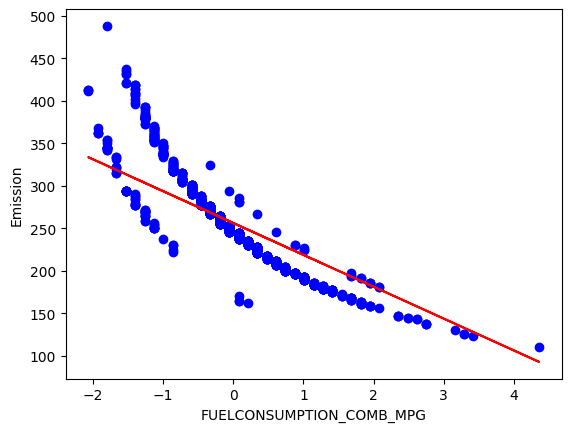

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load Data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"
df = pd.read_csv(url)

# Verify successful load
df.sample(5)
df.describe()

# Drop categorical and useless columns
df = df.drop(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE'], axis=1)
df.corr()

df = df.drop(['CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB'], axis=1)
df.head(9)

# Scatter matrix
axes = pd.plotting.scatter_matrix(df, alpha=0.2)
for ax in axes.flatten():
    ax.xaxis.label.set_rotation(90)
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.gcf().subplots_adjust(wspace=0, hspace=0)
plt.show()

# Prepare Data
X = df.iloc[:, [0,1]].to_numpy()
y = df.iloc[:, [2]].to_numpy()

from sklearn import preprocessing

# Standardization
std_scaler = preprocessing.StandardScaler()
X_std = std_scaler.fit_transform(X)
pd.DataFrame(X_std).describe().round(2)

# Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=42)

# Linear Regression Model
from sklearn import linear_model
regressor = linear_model.LinearRegression()
regressor.fit(X_train, y_train)

# Print coefficients
coef_ = regressor.coef_
intercept_ = regressor.intercept_

print('Coefficients:', coef_)
print('Intercept:', intercept_)

# Adjust coefficients back to original scale
means_ = std_scaler.mean_
std_devs_ = std_scaler.scale_

coef_original = coef_ / std_devs_
intercept_original = intercept_ - np.sum((means_ * coef_) / std_devs_)

print('Original Coefficients:', coef_original)
print('Original Intercept:', intercept_original)

# 3D Visualization
from mpl_toolkits.mplot3d import Axes3D

X1 = X_test[:, 0] if X_test.ndim > 1 else X_test
X2 = X_test[:, 1] if X_test.ndim > 1 else np.zeros_like(X1)

x1_surf, x2_surf = np.meshgrid(np.linspace(X1.min(), X1.max(), 100), 
                               np.linspace(X2.min(), X2.max(), 100))

y_surf = intercept_ + coef_[0, 0] * x1_surf + coef_[0, 1] * x2_surf
y_pred = regressor.predict(X_test)

above_plane = y_test >= y_pred
below_plane = y_test < y_pred
above_plane = above_plane[:, 0]
below_plane = below_plane[:, 0]

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X1[above_plane], X2[above_plane], y_test[above_plane], label="Above Plane", s=70, alpha=0.7, edgecolor='k')
ax.scatter(X1[below_plane], X2[below_plane], y_test[below_plane], label="Below Plane", s=50, alpha=0.3, edgecolor='k')

ax.plot_surface(x1_surf, x2_surf, y_surf, color='k', alpha=0.21)

ax.view_init(elev=10)
ax.legend(fontsize='x-large', loc='upper center')
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
ax.set_box_aspect(None, zoom=0.75)
ax.set_xlabel('ENGINESIZE', fontsize='xx-large')
ax.set_ylabel('FUELCONSUMPTION', fontsize='xx-large')
ax.set_zlabel('CO2 Emissions', fontsize='xx-large')
ax.set_title('Multiple Linear Regression of CO2 Emissions', fontsize='xx-large')

plt.tight_layout()
plt.show()

# 2D Plots
plt.scatter(X_train[:, 0], y_train, color='blue')
plt.plot(X_train[:, 0], coef_[0, 0] * X_train[:, 0] + intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

plt.scatter(X_train[:, 1], y_train, color='blue')
plt.plot(X_train[:, 1], coef_[0, 1] * X_train[:, 1] + intercept_[0], '-r')
plt.xlabel("FUELCONSUMPTION_COMB_MPG")
plt.ylabel("Emission")
plt.show()
